# The Sparks Foundation - *Graduate Rotational Internship Program*
## Data Science & Business Analytics Tasks

### *Task 1 : Prediction using Supervised ML*
   #### What will be predicted score if a student studies for 9.25 hrs/ day?

## PREPARED BY : AMIT A. KULKARNI

## 1. IMPORT LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.rcParams.update({'font.size': 16})

In [20]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
df.shape

(25, 2)

In [22]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### So there are 25 Rows, and No Null values

In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Inference : 
1. As Mean and Median have values nearby, Data given could be having Normal Distribution
2. Standard Deviation of Scores is very high which reflects uncertainity in Student's Score
3. Minimum Score is 17 and Maximum Score is 95
4. Minimum Time a student studies is 1 Hour 10 min (Approx.) and Maximum is 9 Hour 20 Minutes

## 2. Data Visualization

### *2.1 Univariate Analysis*

<AxesSubplot:xlabel='Scores', ylabel='Density'>

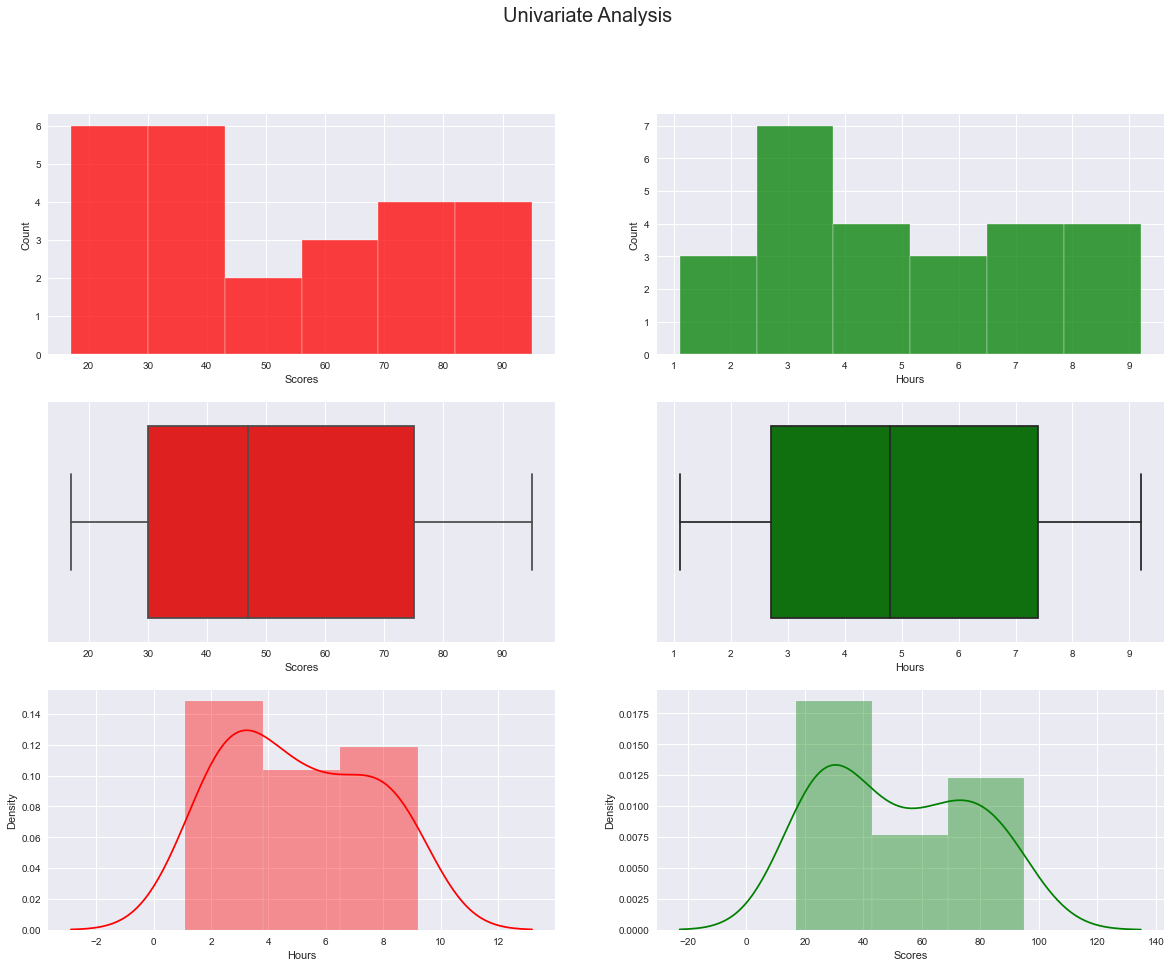

In [26]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3,2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.histplot(x='Scores',data=df,ax=axes[0,0],color='red')
sns.histplot(x='Hours',data=df,ax=axes[0,1],color='green')
sns.boxplot(x='Scores',data=df,ax=axes[1,0],color='red')
sns.boxplot(x='Hours',data=df,ax=axes[1,1],color='green')
sns.distplot(df['Hours'],ax=axes[2,0],color='red')
sns.distplot(df['Scores'],ax=axes[2,1],color='green')

In [27]:
IQR_S = stats.iqr(df['Scores'], interpolation = 'midpoint')
IQR_H = stats.iqr(df['Hours'], interpolation = 'midpoint')
print('IQR of Scores is ' + str(IQR_S),'\n\nIQR of Hours is ' +str(IQR_H))

IQR of Scores is 45.0 

IQR of Hours is 4.7


In [28]:
df.skew(),df.kurtosis()

(Hours     0.190338
 Scores    0.233965
 dtype: float64,
 Hours    -1.302343
 Scores   -1.443833
 dtype: float64)

#### Inferences:
- Most of students score is between 30 and 75, also Time spent is between 2.7 and 7.4 Hours (Approx)
- Data seems to be Normally Distributed
- Inter Quartile Range of Scores is 45, and Time Spent is 4.7
- Both data is having less skewness and kurtosis.

### *2.2 Bivariate Analysis*

Text(0.5, 0.98, 'Scores vs Hours Plot')

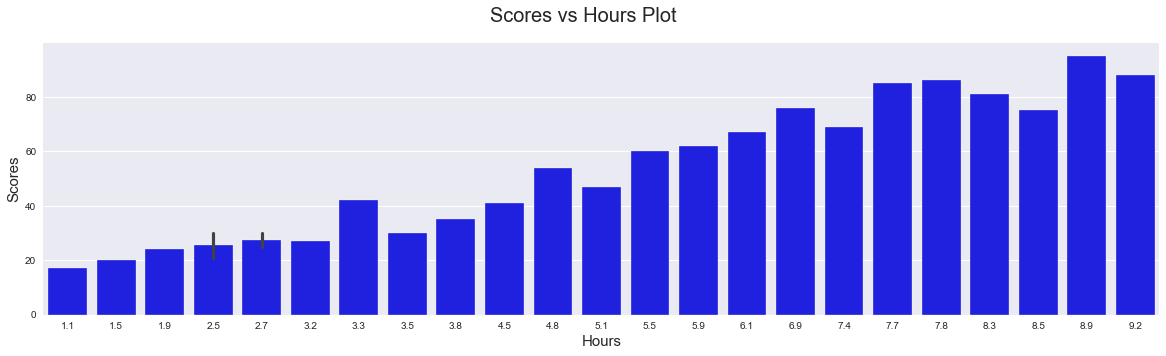

In [29]:
fig, axes = plt.subplots(figsize=(20, 5))
sns.barplot(x='Hours',y='Scores',data=df,color='blue',axes=axes)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.suptitle('Scores vs Hours Plot',fontsize=20)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

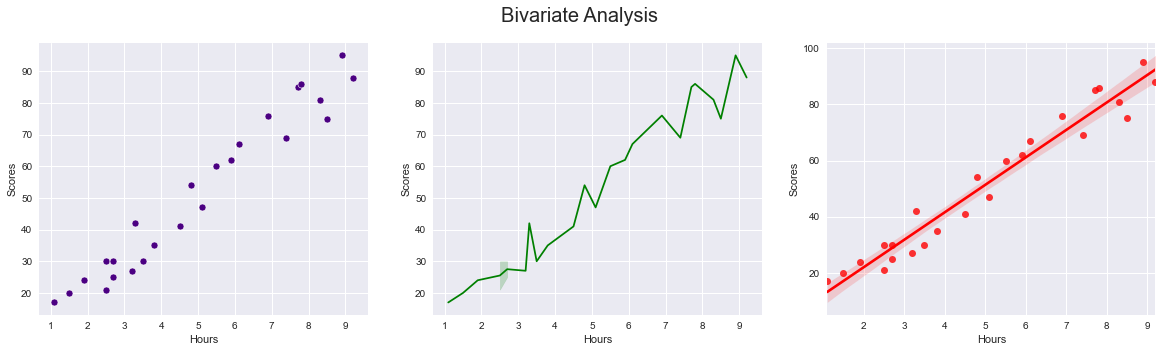

In [30]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle('Bivariate Analysis',fontsize=20)

sns.scatterplot(x='Hours',y='Scores',data=df,ax=axes[0],color='indigo')
sns.lineplot(x='Hours',y='Scores',data=df,ax=axes[1],color='green')
sns.regplot(x='Hours',y='Scores',data=df,ax=axes[2],color='red')

<AxesSubplot:>

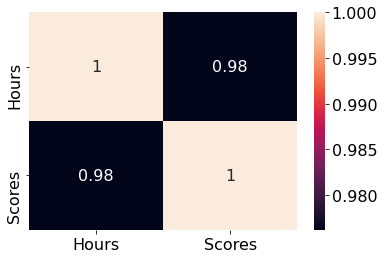

In [15]:
sns.heatmap(df.corr(),annot=True)

### Inference:
- From Barplot we can say that as Student is spending more time studying he is Scoring more Mark's
- From Bivariate Analysis, data seems to be having Linear Relationship
- Correlation between Scores and Hours is 0.98, which explains that Score's column can very well explain Hours

## 3 Auto EDA Library

### 3.1 Sweetviz Library

In [34]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('Task1.html')


Report Task1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2 Autoviz Library

Shape of your Data Set: (25, 2)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    2 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set


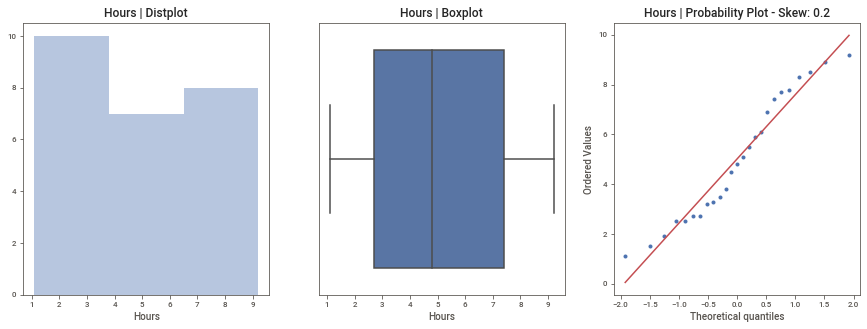

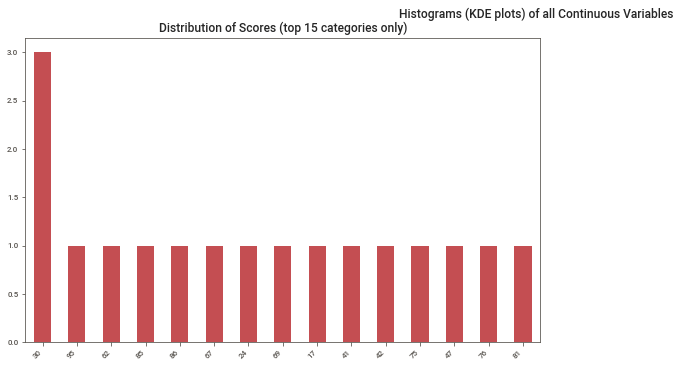

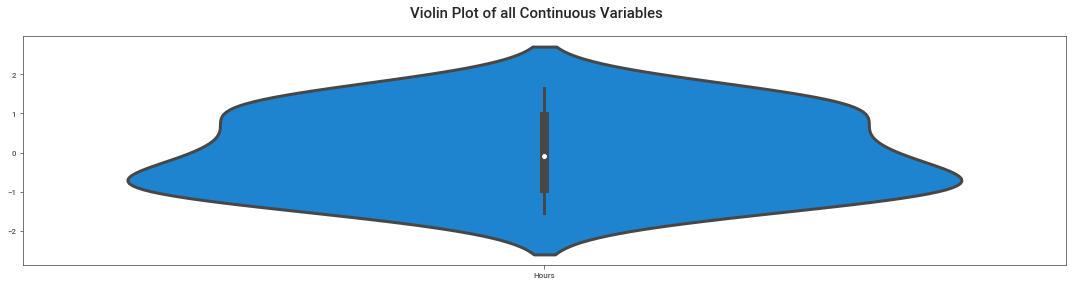

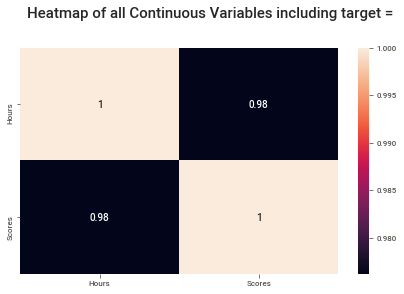

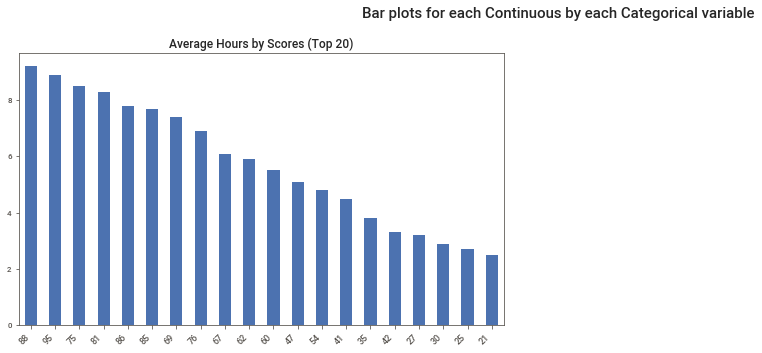

Time to run AutoViz (in seconds) = 5.153

 ###################### VISUALIZATION Completed ########################


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz(url)

### 3.3 DTale Library

In [33]:
import dtale
dtale.show(df)

## 4. Build Model

### 4.1 Using SMF OLS

In [16]:
import statsmodels.formula.api as smf
model1 = smf.ols("Scores~Hours",data=df).fit()

#### Here y = Independednt Variable and X = Dependent Variable

In [17]:
model1.params

Intercept    2.483673
Hours        9.775803
dtype: float64

#### Intercept is a point where line coincides with either of the axis, here it crosses y-axis, Hours represents slope

#### These values represent Equation of Line : y = mx + c, 
y_pred = B0 + B1 * Hours; B0 = Intercept & B1 = Slope

#### Considering our values, equation would be
 y = 2.48 + 9.77 * Hours

In [18]:
print(model1.tvalues, '\n',model1.pvalues)

Intercept     0.981044
Hours        21.582931
dtype: float64 
 Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64


#### As p-value < 0.05 we can consider our y to predict x

## Predict Score for 9.25 Hrs

In [19]:
new_data = pd.Series([9.25])

In [20]:
data_pred = pd.DataFrame(new_data,columns = ['Hours'])

In [21]:
model1.predict(data_pred)

0    92.909855
dtype: float64

#### So our model predicts that with 9.25 Hrs study, a student will score around 92.9~93 Marks

In [22]:
model1.rsquared

0.9529481969048356

## 4.2 Using Sklearn Model

In [28]:
lm = LinearRegression()

In [40]:
X=np.array(df.loc[:,'Hours']).reshape(-1,1)
y=np.array(df.loc[:,'Scores']).reshape(-1,1)

In [41]:
model2 = lm.fit(X,y)
model2.score(X,y)

0.9529481969048356

## Predict Score for 9.25 Hrs

In [46]:
model2.coef_,model2.intercept_

(array([[9.77580339]]), array([2.48367341]))

In [47]:
model2.predict(data_pred)

array([[92.90985477]])

## Visualize Regression

In [50]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

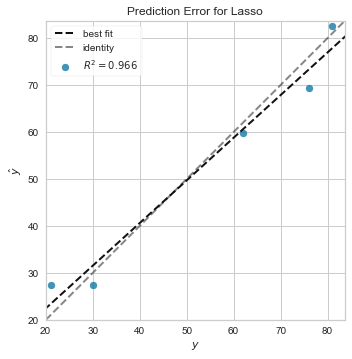

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Lasso
# Instantiate the linear model and visualizer
model3 = Lasso()
visualizer = PredictionError(model3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


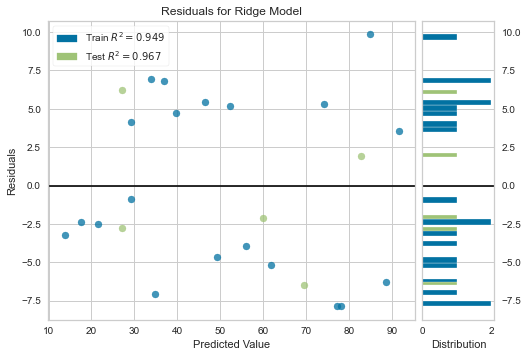

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [60]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Conclusion : 

- Model we built has good Accuracy as can be verified from Prediction Visualizer.
- Both models have similar Accuracy of 0.95
- Both models have predicted 92.90 Marks if a student studies for 9.25 Hour/Day